(64, 64)


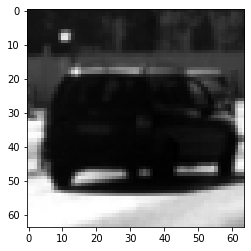

In [2]:
import os
import cv2
import joblib
import numpy as np
from skimage import feature
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

img = cv2.imread('2.png')  #Read vehicle image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting previous image to GRAY
plt.imshow(img,cmap='gray')
print(img.shape) #imamge size 64 x 64 pixels

In [ ]:
hog_vector,hog_img = feature.hog(img,visualize=True) #Get hog feature vector and hog image using skimage feature library
plt.imshow(hog_img,cmap='gray') #Corresponding HOG image to input image
print(hog_img.shape) #Get the size of hog Image
print(hog_vector.shape) #Get the size of hog vector

In [ ]:
data_path=r'D:\4TH YEAR\REserch\DATA SET\archive\data' #Data set path (vehicle and non-vehicle images)
categories=os.listdir(data_path) #category types in the dataset (vehicle and non-vehicle)
print(categories)
labels=np.arange(len(categories)) #train folder contain two categories vehicle and non vehicle
print(labels) #in those folder, corresponding images are stored
label_dict=dict(zip(categories,labels)) #non vehicle as 0 and vehicle as 1
print(label_dict)

In [ ]:
img_size=64 
data=[] #Define array to store images
target=[] #Define array to store images class

for category in categories:  #Creating a function to run the below process through the selected folders
    
    imgs_path=os.path.join(data_path,category) #Select a folder and run below funtion through the images in the folder(vehicle and non-vehicle)
    img_names=os.listdir(imgs_path)
    print(imgs_path)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name) #select image by image in the folder
        print(img_path)
        try:
            img=cv2.imread(img_path) #Read images in selected folder
            img=cv2.resize(img,(img_size,img_size)) #Resize the image before applying any filters
            gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting the image to GRAY because colour is not a feature to a vehicle
            gray = cv2.GaussianBlur(gray1,(5,5),2.0) #Add GaussianBlur to reduce noise in image
            data.append(gray) #Append those images to data predefined array
            target.append(label_dict[category]) #Append previous image category into target predefined array
           
        except Exception as e:
            print(img_path,e)

In [ ]:
data_new=np.array(data) #Converting data into numpy array and renaming it to data_new
target_new=np.array(target) #Converting target into numpy array and renaming it to target_new
print(data_new.shape) #Get the shape of the data_new numpy array
print(target_new.shape) #Get the shape of the target_new numpy array

In [ ]:
plt.imshow(data_new[123],cmap='gray') #Testing 123 image of the renamed array
print(target_new[123]) #Testing 123 image's class of the renamed array

In [3]:
#np.save('data12345',data_new) #Saving data_new array 
#np.save('target12345',target_new) #Saving target new array

data = np.load('data12345.npy') #Load data_new array
target = np.load('target12345.npy') #Load target_new array

In [4]:
data_new  = np.array([feature.hog(im) for im in data])#extracting hog feature in every image in the data 


#data_new  = np.array([cv2.Canny(im,100,200) for im in data])
#data_new = data_new.reshape(17760,4096)


#knn  = cv2.getGaborKernel((5,5),3,1*np.pi/4,1*np.pi/4,0.5,0,ktype=cv2.CV_32F)

#data_new  = np.array([cv2.filter2D(im,cv2.CV_8UC3,knn) for im in data])
#data_new = data_new.reshape(17760,4096)






print(data_new.shape) #There were 17760 images in the array and 2916 features i ''

(17756, 2916)


In [5]:
train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1) #Splitting data from train set to test 
#trainx,testx,trainy,testy                                      x        y
print(train_data.shape) #Getting the size of each set
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(15980, 2916)
(1776, 2916)
(15980,)
(1776,)


In [6]:
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [7]:
print(train_target[:100]) #Category of first 100 images

[0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0]


In [8]:
model = GaussianNB() #Apply linear support vector machine to given data set to classify data into two categories
model.fit(train_data,train_target)

GaussianNB()

In [9]:
cross_val_score(model,data_new,target,cv=10).mean()

0.8562257962187539

In [10]:
predicted_target = model.predict(test_data) #Tesing accuracy in linear svm 

acc = accuracy_score(test_target,predicted_target)
print(acc)

0.8676801801801802


[[766 184]
 [ 51 775]]


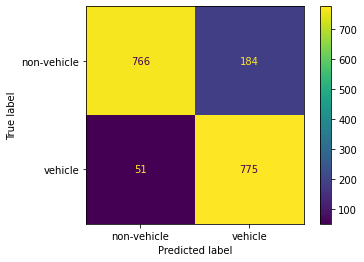

In [14]:
matrix = confusion_matrix(test_target,predicted_target) #for the testing, getting the confusion matrix
print(matrix)
display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['non-vehicle','vehicle'])
display.plot()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Vehicle', 'non-vehicle']))

              precision    recall  f1-score   support

     Vehicle       0.94      0.81      0.87       950
 non-vehicle       0.81      0.94      0.87       826

    accuracy                           0.87      1776
   macro avg       0.87      0.87      0.87      1776
weighted avg       0.88      0.87      0.87      1776



In [25]:
joblib.dump(model,'ML_Algo_VehicleDetection_NaiveBayes.sav')

['ML_Algo_VehicleDetection_NaiveBayes.sav']

In [3]:
model = joblib.load('ML_Algo_VehicleDetection_NaiveBayes.sav')

In [4]:
def detect(img,h=64,w=64,slide=32): #Creating sliding window tecnique to identify images in selected image
    coordinates=[] #Define coordinated function 
    for y in range (0,img.shape[0]-h,slide): #Reduce hight from image shape
        for x in range(0,img.shape[1]-w,slide): #Reducing width form image shape
            window = img[y:y+h,x:x+w] #Getting a patch for identify the vehicles
            #print(patch.shape)
            hog_img = feature.hog(window) #Applying patch to hog feature which saved in vehicle detection model
            label=model.predict([hog_img]) #Applying predictions
            
            if(label==1):
                coordinates.append((x,y,w,h))
    return np.array(coordinates)

(256, 256, 3)


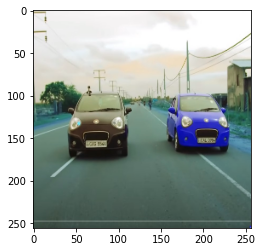

In [5]:
test_img = cv2.imread('DL approach/19.jpg') #Testing above sliding window tecnique to this test image test, dd, cc
test_img = cv2.resize(test_img,(256,256)) #Resizing the testing image
print(test_img.shape) #Get the image shape in tesing
plt.imshow(test_img,cmap='gray') #Show testing image

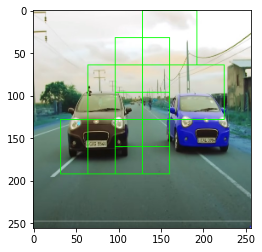

In [5]:
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY) #Converting test image to GRAY
vehicle = detect(gray) #Apply detect function to image
for x,y,w,h in vehicle:
    
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),1) #Apply rectangle to vehicles in the image
    
#cv2.imshow('test_image',test_img) #Show test image with rectangle
#cv2.waitKey(0) #Close window using ESC
#cv2.destroyAllWindows()
plt.imshow(test_img)

In [8]:
source = cv2.VideoCapture('331.mp4') #Testing above method to a video tt

while(True): #Creating a loop to run above function in every frame    
    ret,img = source.read() #Getting frames from video    
    img = cv2.resize(img,(0,0),fx=0.2,fy=0.2) #Resizing
    
    if(ret==False): #Apply the above function to video same as the above test image
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vehicle = detect(gray)
    
    for x,y,w,h in vehicle:    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)    
    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break

cv2.destroyAllWindows()
source.release()